                                            RANDOM FOREST

LOAD THE DATASET :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
xlsx=pd.ExcelFile("glass.xlsx")
print(xlsx.sheet_names)

['Description', 'glass']


In [3]:
glass=pd.read_excel(xlsx,sheet_name="glass")

In [4]:
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


EXPLORATORY DATA ANALYSIS :

In [5]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [6]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [7]:
glass.shape

(214, 10)

Missing Values :

In [8]:
glass.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

DATA VISUALISATION :

BOX PLOT :

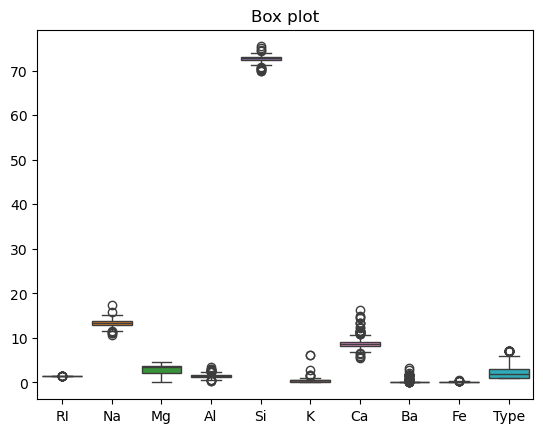

In [10]:
plt.title("Box plot")
sns.boxplot(glass)
plt.show()

In [33]:
#Features have different ranges

#Some skewness present

Histogram :

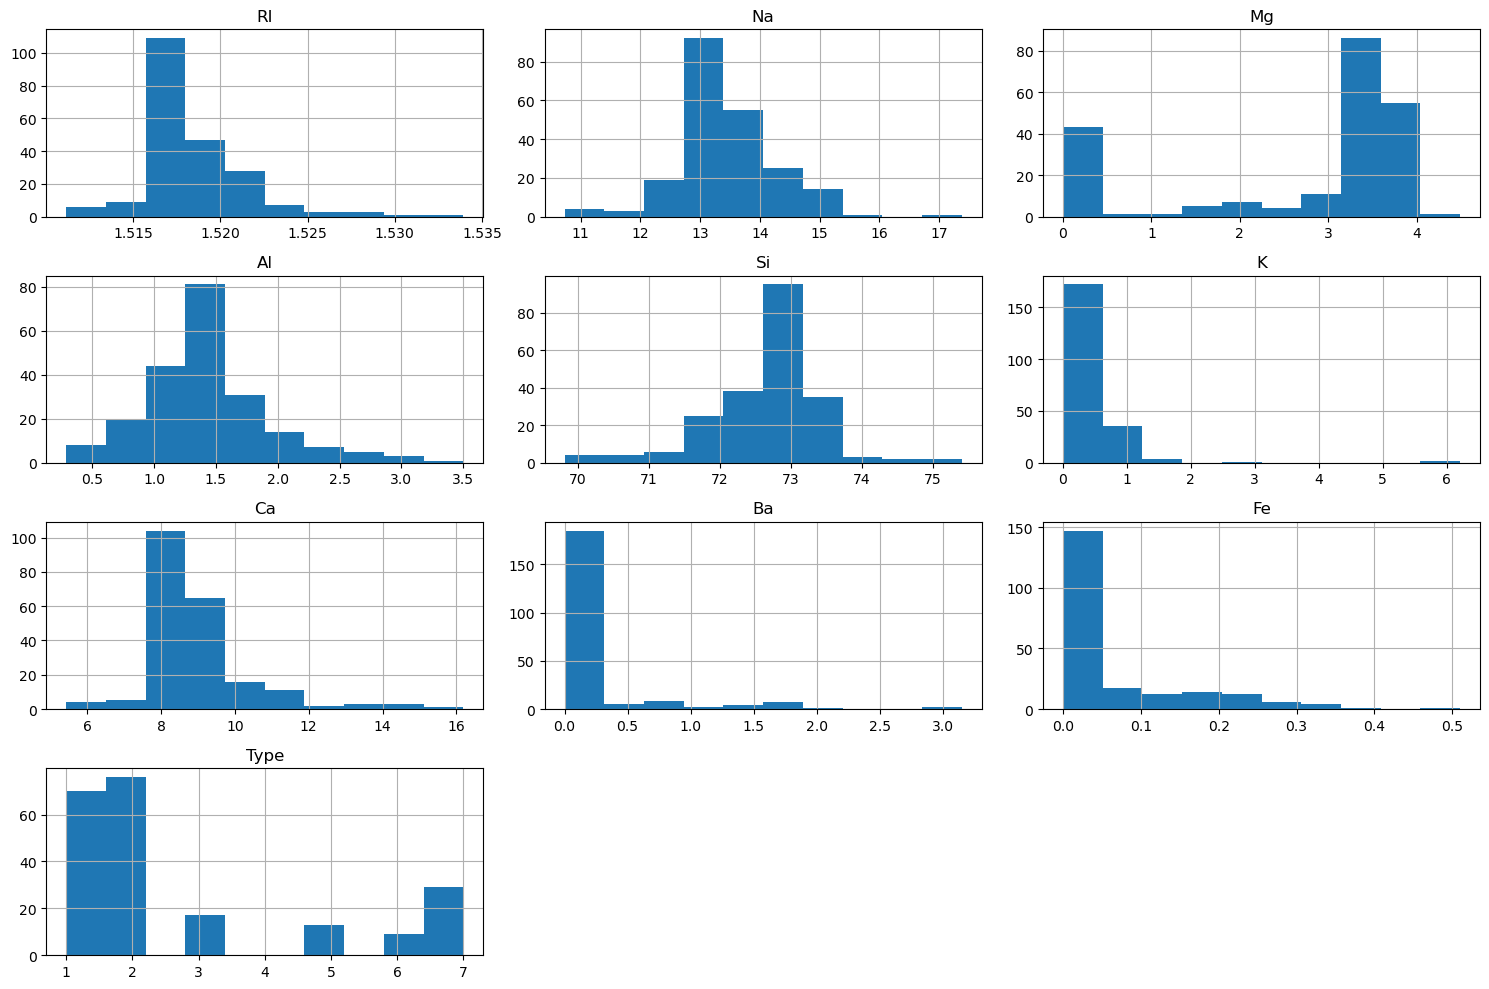

In [14]:
glass.hist(figsize=(15, 10))
plt.title('Histogram')
plt.tight_layout()
plt.show()

Correlation Analysis :

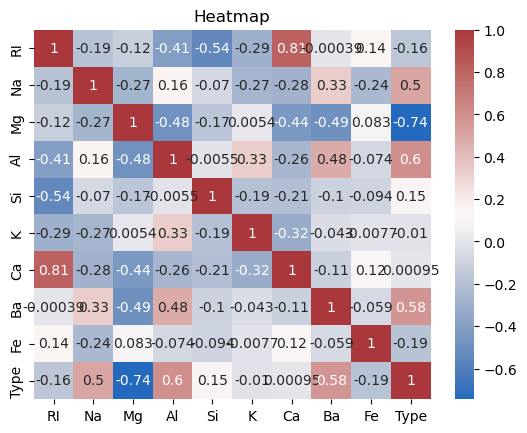

In [15]:
sns.heatmap(glass.corr(numeric_only=True),annot=True,cmap="vlag")
plt.title("Heatmap")
plt.show()

Data Preprocessing :

In [34]:
#No missing values :  No imputation required 
# No categorical values : No conversion needed

Feature & Target Split :

In [17]:
X=glass.drop('Type',axis=1)
y=glass['Type']

Feature Scaling :

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Handling Imbalanced Data :

In [19]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)
X_resampled,y_resampled=smote.fit_resample(X_scaled,y)

In [20]:
#Generates synthetic samples
#Prevents model bias toward majority classes

Random Forest Model :

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

Random Forest Classifier :

In [22]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier( n_estimators=200,random_state=42,class_weight='balanced')
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

Model Evaluation :

In [23]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9239130434782609
              precision    recall  f1-score   support

           1       0.82      0.82      0.82        17
           2       0.89      0.84      0.86        19
           3       0.83      1.00      0.91        10
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00        14
           7       1.00      0.94      0.97        18

    accuracy                           0.92        92
   macro avg       0.92      0.94      0.93        92
weighted avg       0.93      0.92      0.92        92



In [24]:
#Accuracy → Overall correctness
#Precision → Correct positive predictions
#Recall → Ability to capture actual positives
#F1-score → Balance between precision & recall

Bagging and Boosting Methods :

Bagging : Bootstrap Aggregation

In [25]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bagging = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=100,
    random_state=42
)

bagging.fit(X_train, y_train)
y_pred_bag = bagging.predict(X_test)

print("Bagging Accuracy:", accuracy_score(y_test, y_pred_bag))

Bagging Accuracy: 0.9347826086956522


Boosting : AdaBoost 

In [26]:
from sklearn.ensemble import AdaBoostClassifier

boost = AdaBoostClassifier(
    n_estimators=100,
    random_state=42
)

boost.fit(X_train, y_train)
y_pred_boost = boost.predict(X_test)

print("Boosting Accuracy:", accuracy_score(y_test, y_pred_boost))


Boosting Accuracy: 0.532608695652174


Model Comparison :

In [27]:
#Model :

#Random Forest : Best overall, robust to noise
#Bagging      :    Reduces variance
#Boosting     :  Improves weak learners

 Additional Questions :

In [29]:
#Bagging : 

#Trains multiple independent models

#Uses bootstrap sampling

#Reduces variance

#Example: Random Forest

In [30]:
#Boosting :

#Trains models sequentially

#Focuses on previous errors

#Reduces bias

#Example: AdaBoost, Gradient Boosting

In [31]:
#Handling Imbalanced Data :

#Techniques:

#SMOTE – Synthetic data generation

#Class Weighting – Penalize minority misclassification

#Resampling – Over / Under sampling

#Evaluation Metrics – Use F1, Recall instead of Accuracy

In [32]:
#Conclusion :

#Glass dataset is multiclass and imbalanced

#Random Forest performs best

#SMOTE improves minority class recall